In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
from tqdm import tqdm

In [2]:
plt.rcParams['figure.figsize'] = [16, 10]

In [25]:
df = pd.read_csv('cosmetic/2019_Dec.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [27]:
df = df.drop(['category_code'], axis = 1)

In [28]:
for col in df.columns:
    print(col, sum(df[col].isna()), np.round(sum(df[col].isna())/ len(df),2))

event_time 0 0.0
event_type 0 0.0
product_id 0 0.0
category_id 0 0.0
brand 1510289 0.43
price 0 0.0
user_id 0 0.0
user_session 779 0.0


In [29]:
# Fill Brand Null -> NoBrand

noBrandMask = df.brand.isna()
df.loc[noBrandMask, 'brand'] = 'NoBrand'

In [30]:
df.price.describe()

count    3.533286e+06
mean     8.871856e+00
std      1.986474e+01
min     -7.937000e+01
25%      2.060000e+00
50%      4.210000e+00
75%      7.140000e+00
max      3.277800e+02
Name: price, dtype: float64

In [31]:
df = df.drop(df.loc[df.price < 0].index, axis = 0)

In [147]:
df.head(5)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NoBrand,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [164]:
from tqdm._tqdm_notebook import tqdm_notebook

In [171]:
tqdm_notebook.pandas()
df['event_time'] = df['event_time'].progress_apply(lambda x: pd.to_datetime(x))

In [179]:
df['year'] = pd.DatetimeIndex(df['event_time']).year
df['month'] = pd.DatetimeIndex(df['event_time']).month
df['day'] = pd.DatetimeIndex(df['event_time']).day
df['hour'] = pd.DatetimeIndex(df['event_time']).hour
df['day_of_week'] = pd.DatetimeIndex(df['event_time']).dayofweek

#### Brands

In [33]:
total = sum(df.brand.value_counts())
accumulate = 0
for idx, brand in enumerate(df.brand.value_counts()):
    accumulate += brand
    print(idx, accumulate/total)

0 0.42744309234397165
1 0.49995867848122477
2 0.5440877963403852
3 0.587254066207262
4 0.6226844383160293
5 0.6457209020091315
6 0.667414416342038
7 0.6872077068594853
8 0.7053985149159362
9 0.719658118206714
10 0.733145348725316
11 0.7448928300938394
12 0.7562160583346635
13 0.7666401190059741
14 0.7768776667945936
15 0.7870529492809489
16 0.7959766991917964
17 0.804242418067353
18 0.8124470037370503
19 0.8198285553204568
20 0.8259059318455323
21 0.8313725423602172
22 0.8367502833071253
23 0.8420971746270025
24 0.8472182127141219
25 0.852238777245315
26 0.8571936801850298
27 0.8620373546529728
28 0.8667811216131921
29 0.8710293133722096
30 0.8751133511525307
31 0.8791011607384438
32 0.883080479601321
33 0.8868913991239838
34 0.8905681652226777
35 0.8941979493205724
36 0.8977391468747913
37 0.90110345436576
38 0.9041329443450087
39 0.9070495077078784
40 0.9099606936128253
41 0.9127484810096489
42 0.9154547574653267
43 0.9179422562907767
44 0.9204223964895955
45 0.922778006083886
46 0.9

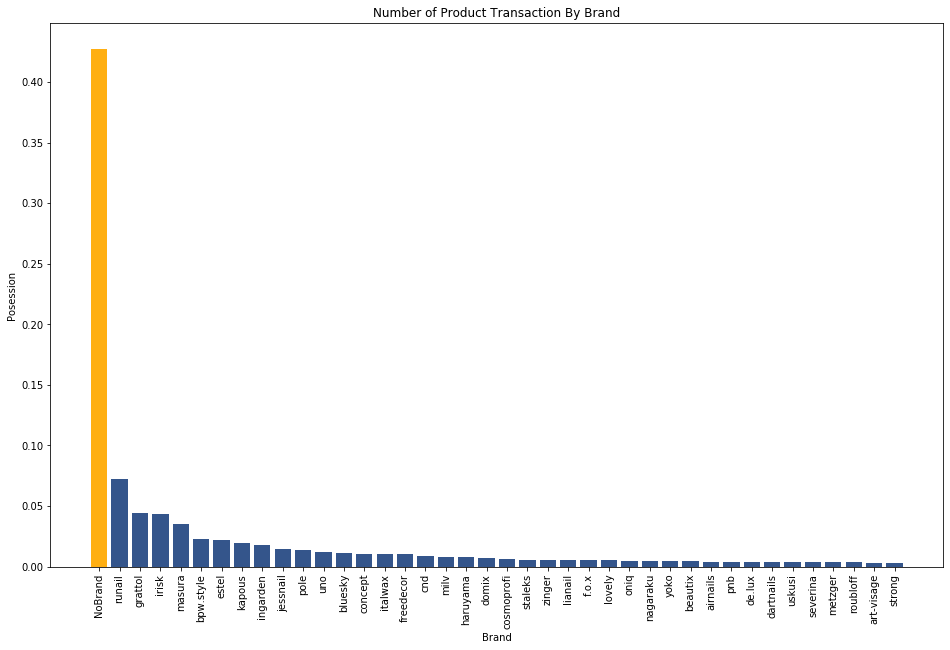

In [40]:
y = df.brand.value_counts(normalize = True)[:40]
x = y.index
colors = tuple('#ffaf12' if idx == 0 else '#34558b' for idx in range(len(y)))

plt.title('Transaction ')
plt.bar(x, y, color = colors)
plt.xticks(rotation = 90)
plt.xlabel('Brand')
plt.ylabel('Posession')
plt.show()

In [51]:
total = sum(df.loc[df.brand != 'NoBrand'].brand.value_counts())
accumulate_count = 0
accumulate_percentage = []
for idx, brand in enumerate(df.loc[df.brand != 'NoBrand'].brand.value_counts()):
    accumulate_count += brand
    accumulate_percentage.append(np.round(accumulate_count / total, 4))

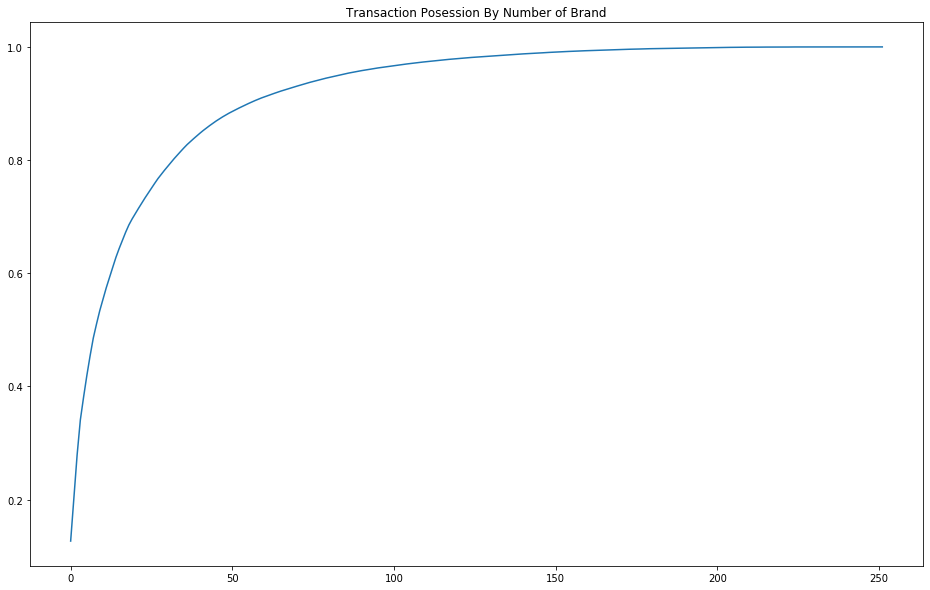

In [54]:
plt.title('Transaction Posession By Number of Brand')
plt.plot(range(0, len(accumulate_percentage)), accumulate_percentage)
plt.show()

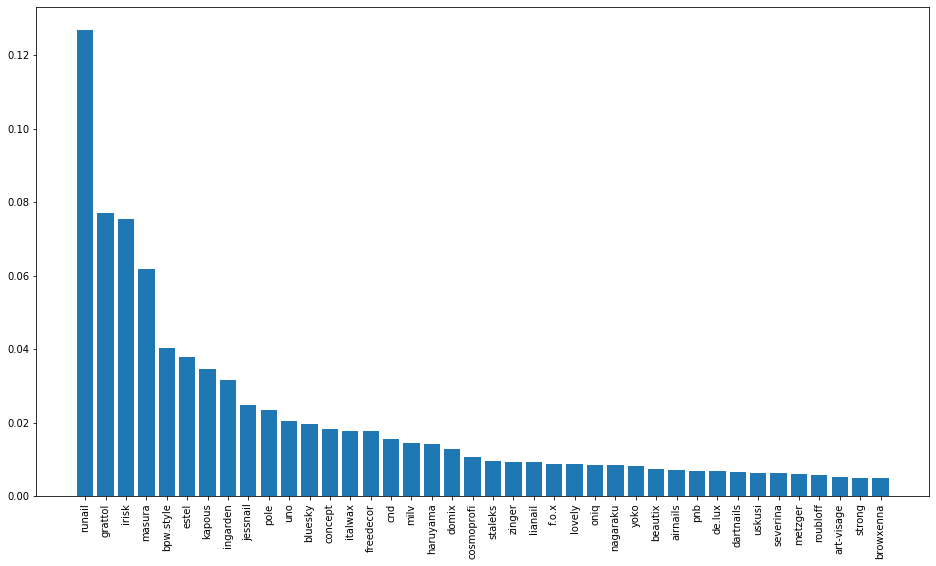

In [55]:
y = df.loc[df.brand != 'NoBrand',:].brand.value_counts(normalize = True)[:40]
x = y.index

plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.show()

In [57]:
# agg('max') -> to determine the price of each product. Better Idea? 
brand_product_price = df.groupby(['brand','product_id'])['price'].agg('max')

In [58]:
dict_bpp = {}
for brand_product in brand_product_price.index:
    
    brand = brand_product[0]
    product = brand_product[1]
    
    dict_bpp[brand] = dict_bpp.get(brand, {})
    dict_bpp[brand][product] = brand_product_price[(brand, product)]

In [59]:
brands = pd.DataFrame()
for brand in dict_bpp.keys():
    array = np.array(list(dict_bpp[brand].values()))
    data = {'items': len(array), 'mean': np.around(np.mean(array), 1), '25%': np.percentile(array, 25),
           '50%': np.percentile(array, 50), '75%': np.percentile(array, 75), 'max': np.max(array), 'min': np.min(array)}
    brands = pd.concat([brands, pd.DataFrame(data = data, index = [brand])])

In [60]:
brands.sort_values(by = ['items'], ascending = False)

,items,mean,25%,50%,75%,max,min
NoBrand,20392,7.0,2.05,4.29,7.46,317.46,0.00
masura,1536,4.1,2.37,3.63,5.54,76.17,0.32
irisk,1468,5.6,1.67,2.54,5.40,144.76,0.16
runail,1313,5.0,1.98,2.62,3.56,184.13,0.00
estel,856,6.2,4.29,5.79,6.75,30.95,0.87
...,...,...,...,...,...,...,...
lunaris,1,23.5,23.48,23.48,23.48,23.48,23.48
macadamia,1,19.0,19.05,19.05,19.05,19.05,19.05
shifei,1,4.7,4.68,4.68,4.68,4.68,4.68
philips,1,3.4,3.43,3.43,3.43,3.43,3.43


검색기준

In [61]:
top_15_brands = df.brand.value_counts(normalize = True)[:15].index

In [62]:
top_15_brands

Index(['NoBrand', 'runail', 'grattol', 'irisk', 'masura', 'bpw.style', 'estel',
       'kapous', 'ingarden', 'jessnail', 'pole', 'uno', 'bluesky', 'concept',
       'italwax'],
      dtype='object')

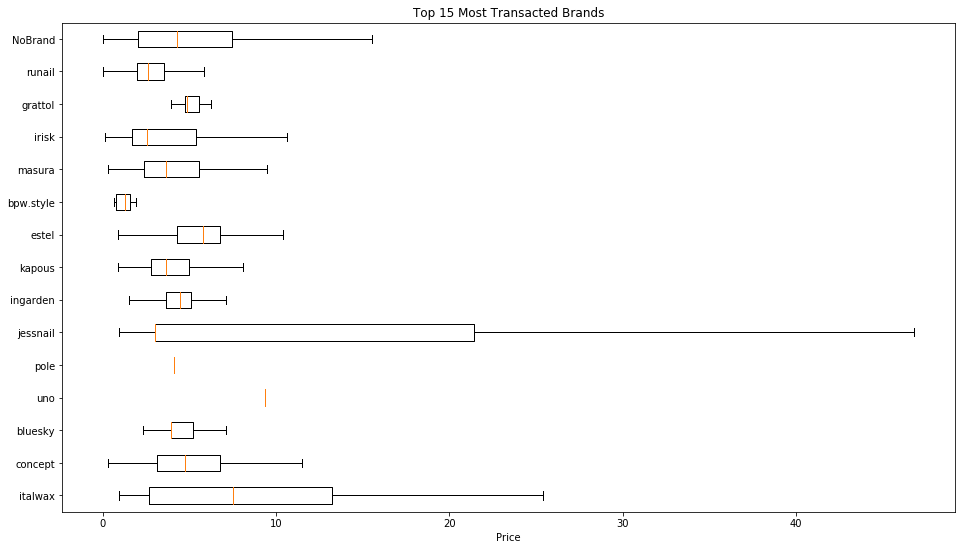

In [63]:
plt.figure(figsize=(16,9))
plt.title('Top 15 Most Transacted Brands')
plt.boxplot([list(dict_bpp[brand].values()) for brand in top_15_brands[::-1]], showfliers = False, vert = False, labels = top_15_brands[::-1])
plt.xlabel('Price')
plt.show()

In [64]:
revenue_by_brand = df.loc[df.event_type == 'purchase', ['brand','price']].groupby('brand').agg(['sum', len, 'mean'])
revenue_by_brand.columns = ['revenue', 'sold', 'average']

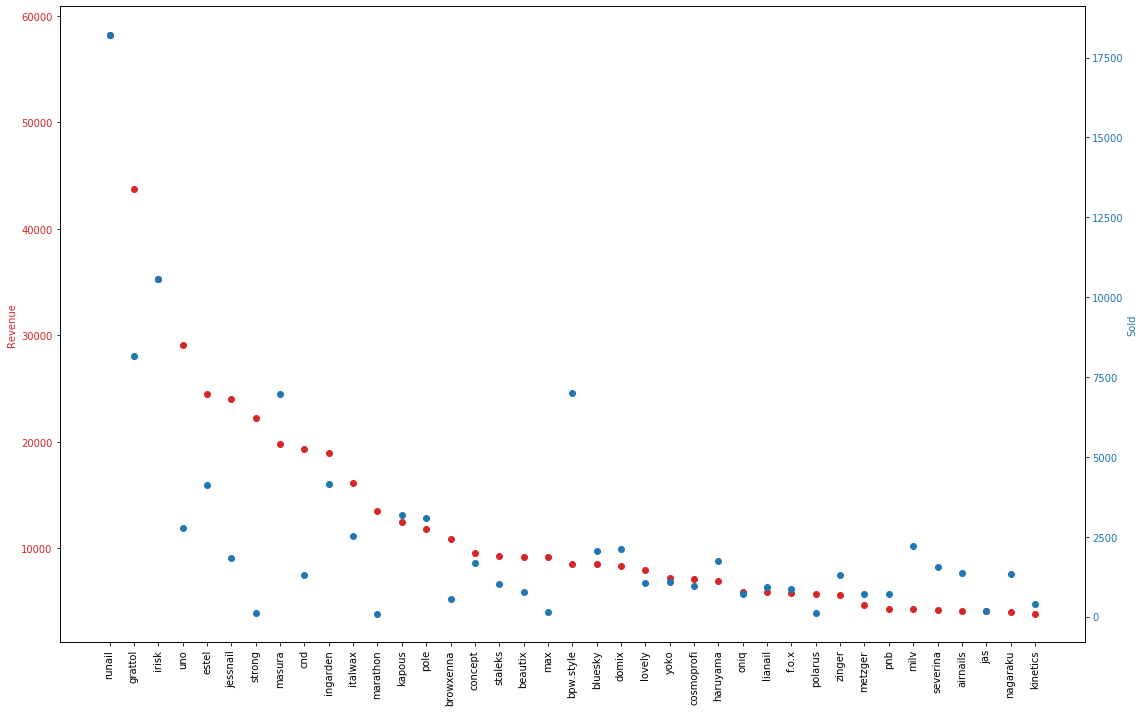

In [73]:
y = revenue_by_brand.sort_values(by = 'revenue', ascending = False)[1:40]
x = y.index

fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
color = 'tab:red'
ax1.set_ylabel('Revenue', color=color)
ax1.scatter(x, y['revenue'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Sold', color=color)  # we already handled the x-label with ax1
ax2.scatter(x, y['sold'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [75]:
price_count = df.loc[:,['product_id','price']].groupby('product_id').agg('min').price.apply(np.ceil).value_counts()

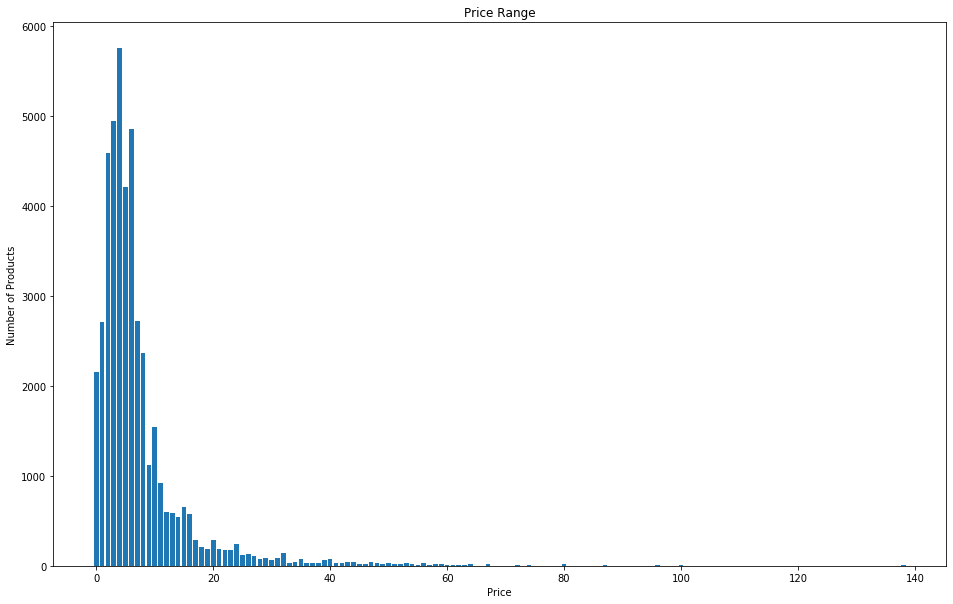

In [76]:
y = price_count[:100]
x = y.index

plt.title('Price Range')
plt.bar(x, y)
plt.xticks()
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.show()

#### Product

In [359]:
df['product_id'].value_counts(ascending = False)[:20].index

Int64Index([5809910, 5809912, 5909810, 5700037, 5802432, 5809911, 5877454,
            5815662, 5854897, 5751422, 5751383, 5886282, 5849033, 5833330,
            5816170, 5649236, 5877456, 5792800, 5856186, 5769877],
           dtype='int64')

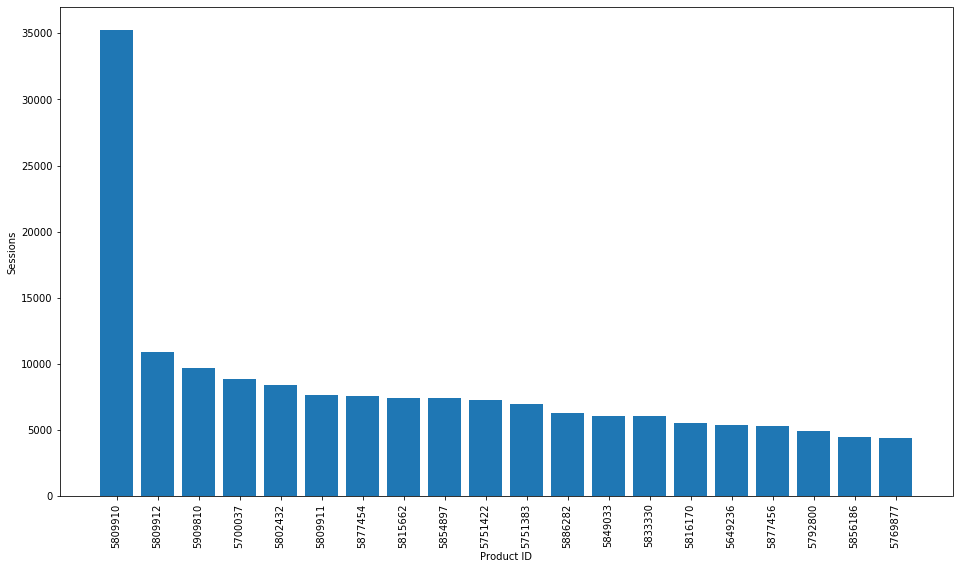

In [360]:
y = df['product_id'].value_counts(ascending = False)[:20]
x = [str(n) for n in y.index]

plt.figure(figsize=(16,9))
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.xlabel('Product ID')
plt.ylabel('Sessions')
plt.show()

In [77]:
df['product_id'].value_counts(ascending = False)[:20].index

Int64Index([5809910, 5809912, 5909810, 5700037, 5802432, 5809911, 5877454,
            5815662, 5854897, 5751422, 5751383, 5886282, 5849033, 5833330,
            5816170, 5649236, 5877456, 5792800, 5856186, 5769877],
           dtype='int64')

In [132]:
product_event = df.groupby(['product_id', 'event_type'])['event_type'].agg(len).unstack()

In [135]:
product_event = product_event.fillna(0)

In [133]:
product_event['conversion_rate'] = product_event.purchase / product_event.view

In [139]:
product_event.conversion_rate.sort_values(ascending = False)

product_id
5700033    12.0
5858991     8.0
5824218     6.0
5826630     6.0
5809819     5.0
           ... 
5836060     0.0
5836073     0.0
5836076     0.0
5836100     0.0
3752        0.0
Name: conversion_rate, Length: 44619, dtype: float64

In [144]:
product_event.loc[product_event.conversion_rate == 8]

event_type,cart,purchase,remove_from_cart,view,conversion_rate
product_id,,,,,
5858991,25.0,8.0,17.0,1.0,8.0


In [145]:
df.loc[df.product_id == 5858991]

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
1285713,2019-12-10 18:18:01 UTC,cart,5858991,1487580007634043851,de.lux,0.79,550880173,60f97fb4-8e9e-42f8-92c3-9d24fe0e216b
1303044,2019-12-10 20:16:31 UTC,cart,5858991,1487580007634043851,de.lux,0.79,348672464,b6760a53-be27-471f-aab6-d3bc22142a64
1330532,2019-12-11 05:02:39 UTC,cart,5858991,1487580007634043851,de.lux,0.79,577873735,8b560fe9-3d2e-41a2-999e-5531e2b6f5d1
1386015,2019-12-11 13:01:41 UTC,cart,5858991,1487580007634043851,de.lux,0.79,535772778,497c7da8-4422-4c23-a0e3-28d41ec2684e
1481034,2019-12-12 06:16:56 UTC,cart,5858991,1487580007634043851,de.lux,0.79,561803423,94f15f6e-6518-4500-addd-d5bd9b529e76
1485143,2019-12-12 06:52:05 UTC,purchase,5858991,1487580007634043851,de.lux,0.79,550880173,768776be-03f7-45a2-b1c3-6f527059319c
1485422,2019-12-12 06:54:37 UTC,remove_from_cart,5858991,1487580007634043851,de.lux,0.79,550880173,768776be-03f7-45a2-b1c3-6f527059319c
1485423,2019-12-12 06:54:37 UTC,remove_from_cart,5858991,1487580007634043851,de.lux,0.79,550880173,768776be-03f7-45a2-b1c3-6f527059319c
1530499,2019-12-12 12:31:57 UTC,cart,5858991,1487580007634043851,de.lux,0.79,584795130,e4b1d940-2d31-45fe-825e-49ff89ab6cfc
1551846,2019-12-12 15:20:13 UTC,purchase,5858991,1487580007634043851,de.lux,0.79,348672464,68e50641-d8de-47ed-93ee-1837bcca0d56


#### By Time

In [182]:
df.head(5)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,year,month,day,hour,day_of_week
0,2019-12-01 00:00:00+00:00,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019,12,1,0,6
1,2019-12-01 00:00:00+00:00,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019,12,1,0,6
2,2019-12-01 00:00:02+00:00,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019,12,1,0,6
3,2019-12-01 00:00:05+00:00,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019,12,1,0,6
4,2019-12-01 00:00:07+00:00,view,5824148,1487580005511725929,NoBrand,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019,12,1,0,6


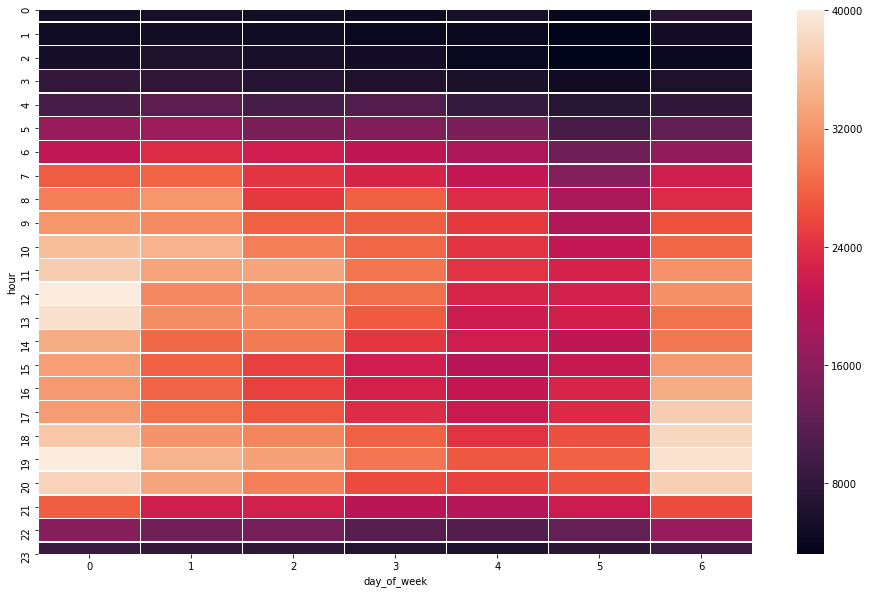

In [189]:
sns.heatmap(df.groupby(['day_of_week', 'hour'])['event_type'].agg(len).unstack().T, linewidth = 0.4)